In [ ]:
# 필요한 라이브러리 설치 및 임포트
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score # train data와 test data split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # 모델 성능 평가
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
colab_path = 'drive/MyDrive/Colab Notebooks/detection/binary_2'

In [ ]:
#데이터 로드
# df =  colab_path + '/final_dataset.csv'
df =  colab_path + '/final_dataset.csv'

In [ ]:
df = pd.read_csv(df)

In [ ]:
df.head() # data load 확인 : 상위 5개 행 출력

,file_name,Entropy,ATT_Tactic_ Collection,ATT_Tactic_ Command and Control,ATT_Tactic_ Credential Access,ATT_Tactic_ Defense Evasion,ATT_Tactic_ Discovery,ATT_Tactic_ Execution,ATT_Tactic_ Impact,ATT_Tactic_ Persistence,...,namespace_targeting,namespace_impact,capabilityNum_matches,ATT_Tech_pca1,ATT_Tech_pca2,ATT_Tech_pca3,ATT_Tech_pca4,MBC_bahve_pca1,MBC_bahve_pca2,Y
0,A3Dll32.dll,3.627348,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,175.0,-0.160982,-0.592856,0.136371,0.078794,0.093819,-0.245911,0.0
1,ACEWrapper.dll,6.206575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,-0.996393,0.035682,-0.143355,-0.166479,-1.857098,0.137600,0.0
2,act_tracing.dll,5.201988,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,238.0,-0.714505,-0.104448,-0.203630,-0.290218,-0.288292,1.195986,0.0
3,Adobe Premiere Pro.exe,3.411478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,-1.286573,0.255840,0.103630,0.142646,-1.857098,0.137600,0.0
4,AdobeCrashReport.exe,5.994713,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,168.0,-0.034360,-0.385603,-0.397255,-0.187214,0.831438,-0.083490,0.0


In [ ]:
df.shape # 차원 확인 : (행, 열) 출력

(47870, 91)

In [ ]:
df['Y'].value_counts() #0과 1의 빈도수 count

,count
Y,
1.0,34764
0.0,12605


In [ ]:
df.count() # 각 열의 NaN값(결측값)을 제외한 행 개수 count

,0
file_name,47370
Entropy,47363
ATT_Tactic_ Collection,47370
ATT_Tactic_ Command and Control,47370
ATT_Tactic_ Credential Access,47370
...,...
ATT_Tech_pca3,47370
ATT_Tech_pca4,47370
MBC_bahve_pca1,47370
MBC_bahve_pca2,47370


In [ ]:
# -1 레이블 제외
#df = df[df['Label'] != -1]

# 데이터와 레이블 분리
# X = df.drop(['Y', 'file_name'], axis=1)  # 'Y'과 'file name' 열을 제외한 모든 데이터
X = df.drop(['Y'], axis=1)  # 'Y' 열을 제외한 모든 데이터
y = df['Y']  # 정상(0) or 악성(1)

Text(0.5, 1.0, 'Y')

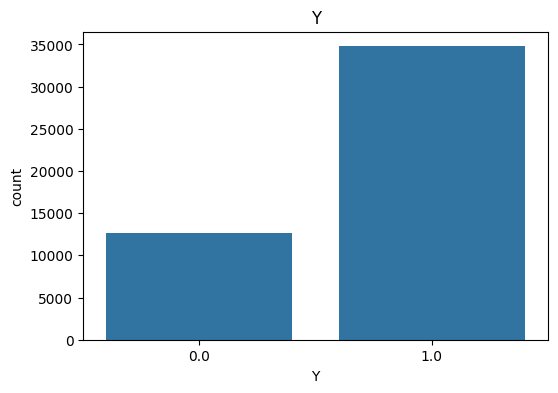

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 타겟 변수 분포_ 1:3임을 알 수 있다.
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df)
plt.title('Y')

In [ ]:
df.isnull().sum() # 결측값 확인

,0
file_name,500
Entropy,507
ATT_Tactic_ Collection,500
ATT_Tactic_ Command and Control,500
ATT_Tactic_ Credential Access,500
...,...
ATT_Tech_pca3,500
ATT_Tech_pca4,500
MBC_bahve_pca1,500
MBC_bahve_pca2,500


In [ ]:
# NaN 값을 포함하는 행 제거
df = df.dropna()
df.shape

(47362, 91)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# SMOTE를 사용하여 오버샘플링
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = X, y

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) # 데이터를 학습 세트와 테스트 세트로 80:20 비율로 분할


In [ ]:
X_resampled.shape

(47870, 90)

In [ ]:
# 문자열 값이 포함된 열 확인
print(X_train.info())  # 데이터 타입 확인
print(X_train.head())  # 데이터 샘플 확인

<class 'pandas.core.frame.DataFrame'>
Index: 38296 entries, 19762 to 15795
Data columns (total 90 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   file_name                                                                                                      37896 non-null  object 
 1   Entropy                                                                                                        37889 non-null  float64
 2   ATT_Tactic_ Collection                                                                                         37896 non-null  float64
 3   ATT_Tactic_ Command and Control                                                                                37896 non-null  float64
 4   ATT_Tactic_ Credential Access                  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 문자열 데이터를 Label Encoding
label_encoder = LabelEncoder()

# 모든 열에 대해 문자열 변환 적용
for column in X_train.columns:
    if X_train[column].dtype == 'object':  # 문자열 데이터일 경우
        X_train[column] = label_encoder.fit_transform(X_train[column])

# y_train도 변환 (필요한 경우)
if y_train.dtype == 'object':
    y_train = label_encoder.fit_transform(y_train)

In [ ]:
# NaN 값 확인
print(y_train.isnull().sum())  # NaN 값 개수 출력
print(y_train[y_train.isnull()])  # NaN 값 위치 확인

401
47380   NaN
47477   NaN
47829   NaN
47421   NaN
47698   NaN
         ..
47794   NaN
47394   NaN
47593   NaN
47538   NaN
47716   NaN
Name: Y, Length: 401, dtype: float64


In [ ]:
# NaN 값이 포함된 데이터 제거
X_train = X_train[~y_train.isnull()]  # y_train이 NaN인 행 제거
y_train = y_train.dropna()  # NaN 제거

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# RandomForestClassifier 모델 생성 및 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 교차 검증 수행
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

Cross-validation scores: [0.93099353 0.93125742 0.93099353 0.92954216 0.93046576]
Average CV score: 0.9306504815938779


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 문자열 데이터를 Label Encoding
label_encoder = LabelEncoder()

# X_test의 모든 열에 대해 문자열 변환 적용
for column in X_test.columns:
    if X_test[column].dtype == 'object':  # 문자열 데이터일 경우
        X_test[column] = label_encoder.fit_transform(X_test[column])

In [ ]:
# y_test에서 NaN 값 제거
non_nan_indices = ~y_test.isnull()  # NaN이 아닌 인덱스
y_test = y_test[non_nan_indices]
X_test = X_test[non_nan_indices]  # X_test도 동일한 인덱스 처리

In [ ]:
# 테스트 세트에 대한 모델 성능 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=3)  # 여기서 digits 매개변수를 활용해 셋째 자리까지 나타낼 수 있어

print("RandomForest 모델 평가")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

RandomForest 모델 평가
Accuracy: 0.9208
Classification Report:
              precision    recall  f1-score   support

         0.0      0.910     0.777     0.838      2503
         1.0      0.924     0.972     0.948      6971

    accuracy                          0.921      9474
   macro avg      0.917     0.875     0.893      9474
weighted avg      0.920     0.921     0.919      9474



In [ ]:
# 피처 중요도 계산 및 출력
feature_importances = model.feature_importances_
feature_names = X_resampled.columns
importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importances_df = importances_df.sort_values('importance', ascending=False)

print("Top 50 Feature Importances:")
print(importances_df.head(50))

Top 50 Feature Importances:
                              feature  importance
1                             Entropy    0.139453
83              capabilityNum_matches    0.115904
0                           file_name    0.094483
89                     MBC_bahve_pca2    0.055691
88                     MBC_bahve_pca1    0.048732
75                        namespace_n    0.044118
84                      ATT_Tech_pca1    0.035995
87                      ATT_Tech_pca4    0.032258
85                      ATT_Tech_pca2    0.031936
66               namespace_executable    0.031590
86                      ATT_Tech_pca3    0.028944
76         namespace_host-interaction    0.025380
73        namespace_data-manipulation    0.016538
77            namespace_communication    0.015129
81                namespace_targeting    0.014383
53                    MBC_obj_Process    0.014221
57                  namespace_runtime    0.013510
56            namespace_anti-analysis    0.012866
36                   M

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and direc

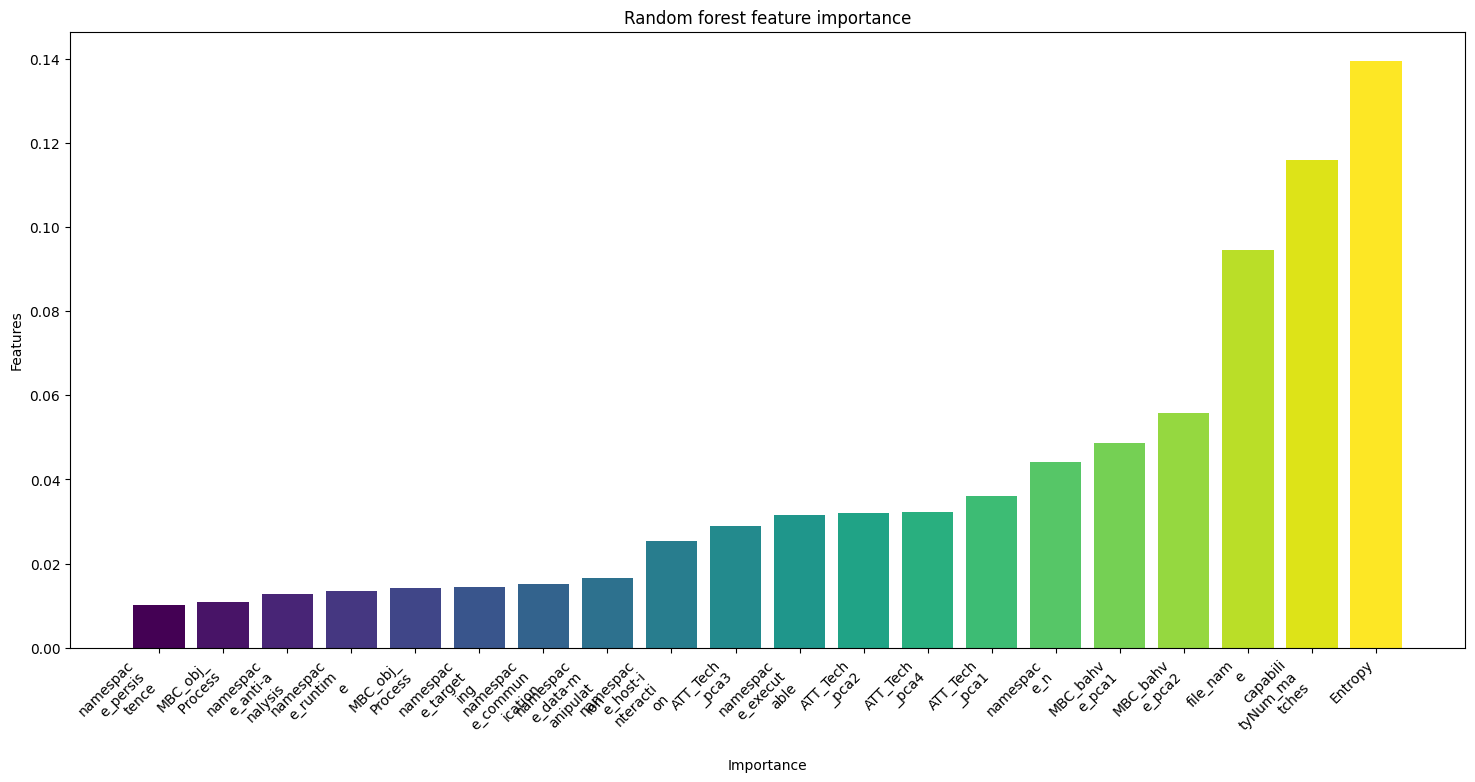

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 가정: feature_importances와 feature_names이 정의되어 있음
# feature_importances = ...
# feature_names = ...

def split_long_words(s, n):
    """주어진 문자열 s를 길이 n마다 줄바꿈 문자를 삽입하여 반환"""
    return '\n'.join([s[i:i+n] for i in range(0, len(s), n)])

# 상위 20개 특성 선택
indices = np.argsort(feature_importances)[-20:]

# 색상 맵 설정
cmap = plt.cm.viridis  # 또는 plt.cm.tab20 등 다양한 colormap 사용 가능
colors = cmap(np.linspace(0, 1, len(indices)))

# 특성 이름을 지정된 길이마다 줄바꿈 처리
max_length = 8
split_feature_names = [split_long_words(feature_names[i], max_length) for i in indices]

plt.figure(figsize=(18, 8))
plt.title(f"Random forest feature importance")
plt.bar(range(len(indices)), feature_importances[indices], color=colors, align='center')
plt.xticks(range(len(indices)), split_feature_names, rotation=45, ha='right')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## **검증코드**

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

# 검증을 위해 기존 데이터에서 500개를 분리하여 검증용 데이터로 저장시킴
from google.colab import drive
drive.mount('/content/drive')
colab_path = 'drive/MyDrive/Colab Notebooks/detection/binary_2'
#데이터 로드
df =  colab_path + '/verification.csv'
# 검증용 데이터 분리
validation_data = pd.read_csv(df) # 검증 데이터 csv명 추가하기
# validation_data.head()
#print(validation_data.columns)
validation_labels = validation_data['Y']
validation_FileName = validation_data['file_name']
validation_features = validation_data.drop(columns=['Y'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
validation_features.head()

,file_name,Entropy,ATT_Tactic_ Collection,ATT_Tactic_ Command and Control,ATT_Tactic_ Credential Access,ATT_Tactic_ Defense Evasion,ATT_Tactic_ Discovery,ATT_Tactic_ Execution,ATT_Tactic_ Impact,ATT_Tactic_ Persistence,...,namespace_WHERE,namespace_targeting,namespace_impact,capabilityNum_matches,ATT_Tech_pca1,ATT_Tech_pca2,ATT_Tech_pca3,ATT_Tech_pca4,MBC_bahve_pca1,MBC_bahve_pca2
0,837F879A4E1619DC940A3CEFD5BCA6673D55C9D83D392E...,7.573553,0,0,0,0,0,0,0,0,...,0,0,0,1,-1.286573,0.25584,0.103630,0.142646,-1.785315,0.094748
1,83860AE6374C04CACD491F6412319FFF41247F349ADFCA...,6.473819,0,0,0,0,0,0,0,0,...,0,0,0,32,-1.238924,0.21717,0.198057,0.121841,-1.825789,0.209480
2,838D0A40B62E51A8986ED19DFE41E608192E67431BCAC5...,7.665685,0,0,0,0,0,0,0,0,...,0,0,0,2,-1.286573,0.25584,0.103630,0.142646,-1.785315,0.094748
3,83900F9E2B44A463E74FEC7589933AAE01CA423020117F...,5.651919,0,0,0,0,0,0,0,0,...,0,0,0,1,-1.286573,0.25584,0.103630,0.142646,-1.857098,0.137600
4,839F15AAAF780DADF0B45721C34881FBDC41F808464742...,7.853958,0,0,0,0,0,0,0,0,...,0,0,0,1,-1.286573,0.25584,0.103630,0.142646,-1.785315,0.094748


In [ ]:
# 학습 데이터의 피처 이름 확인
expected_features = model.feature_names_in_

# 검증 데이터에 일치하도록 피처 정렬 및 누락된 열 처리
validation_features = validation_features.reindex(columns=expected_features, fill_value=0)

# 검증 데이터에 대한 악성 확률 예측
y_pred_prob = model.predict_proba(validation_features)[:, 1]

# 결과 출력
for i, prob in enumerate(y_pred_prob):
    print(f"Validation Sample {i}: Malignant Probability = {prob:.4f}")

Validation Sample 0: Malignant Probability = 1.0000
Validation Sample 1: Malignant Probability = 0.9500
Validation Sample 2: Malignant Probability = 1.0000
Validation Sample 3: Malignant Probability = 0.5000
Validation Sample 4: Malignant Probability = 1.0000
Validation Sample 5: Malignant Probability = 0.7800
Validation Sample 6: Malignant Probability = 1.0000
Validation Sample 7: Malignant Probability = 1.0000
Validation Sample 8: Malignant Probability = 0.9900
Validation Sample 9: Malignant Probability = 0.9900
Validation Sample 10: Malignant Probability = 0.8500
Validation Sample 11: Malignant Probability = 1.0000
Validation Sample 12: Malignant Probability = 1.0000
Validation Sample 13: Malignant Probability = 1.0000
Validation Sample 14: Malignant Probability = 0.9900
Validation Sample 15: Malignant Probability = 1.0000
Validation Sample 16: Malignant Probability = 1.0000
Validation Sample 17: Malignant Probability = 1.0000
Validation Sample 18: Malignant Probability = 1.0000
Val

In [86]:
import pandas as pd

# 악성 확률이 0.9 이상인 파일 정보를 담을 데이터프레임 생성
detection_df = pd.DataFrame(columns=['file name', 'capabilityNum matches', 'Y'])

# 각 파일에 대해 검증 데이터를 기반으로 악성 확률 확인
for file_name, prob, capabilityNum_matches, Y in zip(validation_FileName, y_pred_prob, validation_data['capabilityNum_matches'], validation_data['Y']):
    if prob >= 0.60:
        # 악성 확률이 0. 이상인 경우에만 데이터프레임에 추가
        detection_df = pd.concat([detection_df, pd.DataFrame({'file name': [file_name],
                                                              'capabilityNum matches': [capabilityNum_matches],
                                                              'Y': [Y]})], ignore_index=True)

# 결과를 CSV 파일로 저장
detection_df.to_csv('drive/MyDrive/Colab Notebooks/detection/binary_2/result.csv', index=False)


In [71]:
# 데이터프레임 다시 로드
before_detection_df = pd.read_csv('drive/MyDrive/Colab Notebooks/detection/binary_2/verification.csv')

# 'Y' 열의 값 개수 카운트
y_counts = before_detection_df['Y'].value_counts()

# 결과 출력
print(y_counts)

Y
1    389
0    111
Name: count, dtype: int64


In [87]:
# 데이터프레임 다시 로드
detection_df = pd.read_csv('drive/MyDrive/Colab Notebooks/detection/binary_2/result.csv')

# 'Y' 열의 값 개수 카운트
y_counts = detection_df['Y'].value_counts()

# 결과 출력
print(y_counts)

Y
1    370
0     32
Name: count, dtype: int64


In [63]:
import pandas as pd
from sklearn.metrics import f1_score

# 검증 데이터에 대한 확률값 예측
y_pred_prob = model.predict_proba(validation_features)[:, 1]  # 모델로부터 확률값 예측

# 임계값 목록
thresholds = [i / 10 for i in range(1, 10)]  # 0.1부터 0.9까지

# F1 Score 계산 결과 저장
f1_scores = []

for threshold in thresholds:
    # 임계값에 따른 예측값 생성
    y_pred = (y_pred_prob >= threshold).astype(int)

    # F1 Score 계산
    f1 = f1_score(validation_data['Y'], y_pred)
    f1_scores.append({'Threshold': threshold, 'F1 Score': f1})

# F1 Score 테이블 생성
f1_score_table = pd.DataFrame(f1_scores)

# F1 Score 테이블 출력
print("F1 Score Table")
print(f1_score_table)


F1 Score Table
   Threshold  F1 Score
0        0.1  0.911007
1        0.2  0.912530
2        0.3  0.921241
3        0.4  0.927711
4        0.5  0.937423
5        0.6  0.935525
6        0.7  0.941785
7        0.8  0.928000
8        0.9  0.888260


In [67]:
# 데이터프레임 다시 로드
detection_df = pd.read_csv('drive/MyDrive/Colab Notebooks/detection/binary_2/result.csv')

# 'Y' 열의 값 개수 카운트
y_counts = detection_df['Y'].value_counts()

# 결과 출력
print(y_counts)


Y
1    389
0    111
Name: count, dtype: int64
